# Dataset Information

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


|s.no|Variable| Description|
|--|---------|----------------|
|1|Loan_ID| Unique Loan ID|
|2|Gender| Male/ Female|
|3|Married|Applicant married (Y/N)|
|4|Dependents|Number of dependents|
|5|Education|Applicant Education (Graduate/ Under Graduate)|
|6|Self_Employed|Self employed (Y/N)|
|7|ApplicantIncome|Applicant income|
|8|Coapplicant Income|Coapplicant income|
|9|LoanAmount|Loan amount in thousands|
|10|Loan_Amount_Term|Term of loan in months|
|11|Credit_History|credit history meets guidelines|
|12|Property_Area|Urban/ Semi Urban/ Rural|
|13|Loan_Status|Loan approved (Y/N)|



# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
data=pd.read_csv('C:/Users/Mahi/Downloads/Loan prediction dataset.csv')

In [94]:
 data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing the dataset
##data cleaning and filling missing values

In [98]:
#finding null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [101]:
###filling missing values 
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0]) 
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])



In [102]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

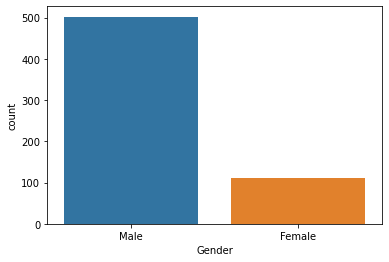

In [85]:
# categorical attributes visualization
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

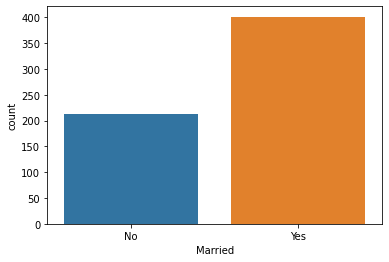

In [86]:
sns.countplot(data['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

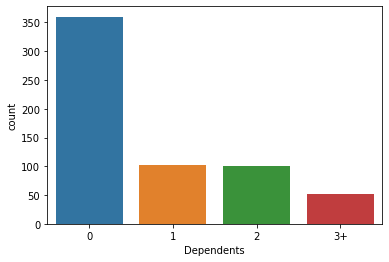

In [87]:
sns.countplot(data['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

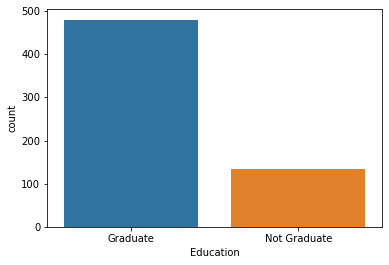

In [88]:
sns.countplot(data['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

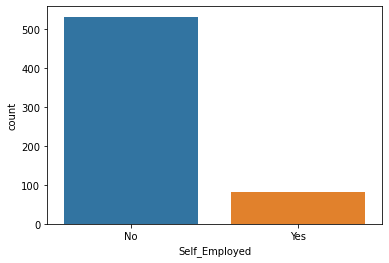

In [89]:
sns.countplot(data['Self_Employed'])


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

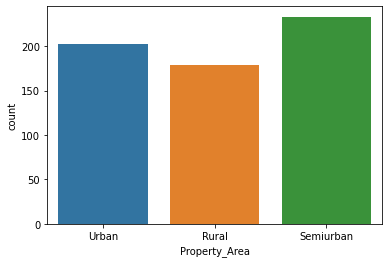

In [90]:
sns.countplot(data['Property_Area'])


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

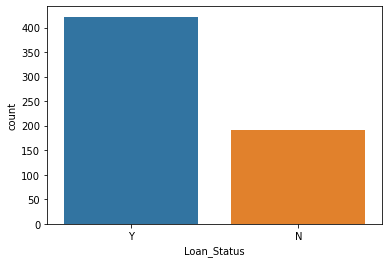

In [106]:
sns.countplot(data['Loan_Status'])


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

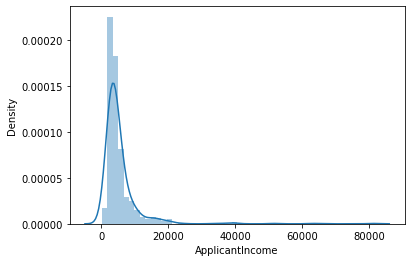

In [109]:
# numerical attributes visualization
sns.distplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

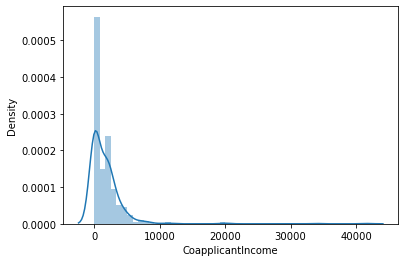

In [111]:
sns.distplot(data["CoapplicantIncome"])


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

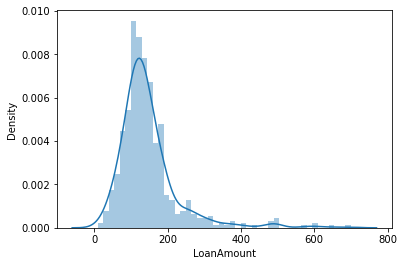

In [112]:
sns.distplot(data["LoanAmount"])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

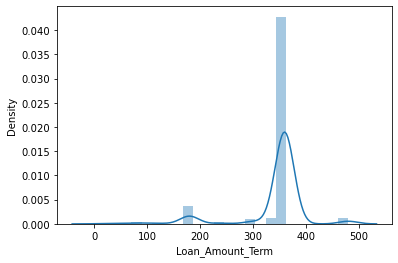

In [113]:
sns.distplot(data['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

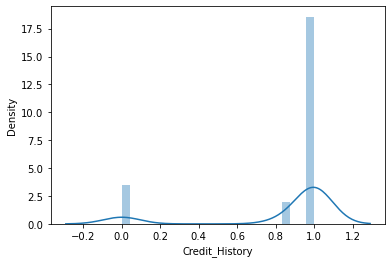

In [114]:
sns.distplot(data['Credit_History'])


## Log transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

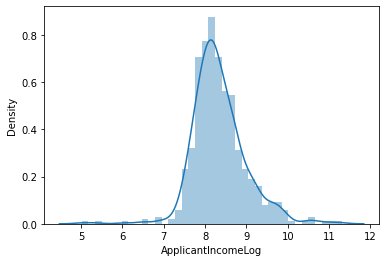

In [116]:
data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome'])
sns.distplot(data["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

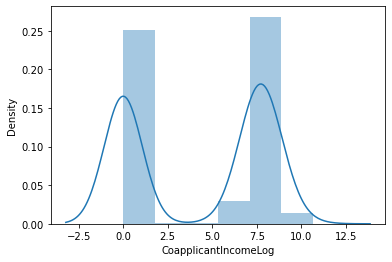

In [124]:

data['CoapplicantIncomeLog'] = np.log(data['CoapplicantIncome']+1)
sns.distplot(data["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

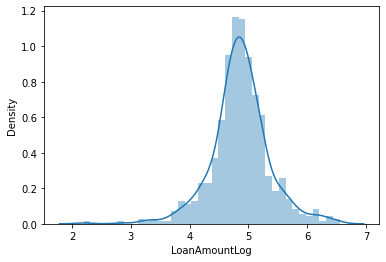

In [120]:
data['LoanAmountLog'] = np.log(data['LoanAmount'])
sns.distplot(data["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

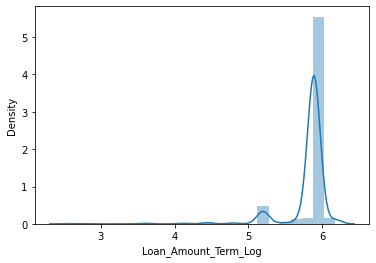

In [125]:
data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term']+1)
sns.distplot(data["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

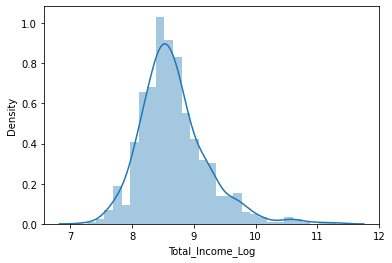

In [126]:
data['Total_Income_Log'] = np.log(data['Total_Income']+1)
sns.distplot(data["Total_Income_Log"])

# Creation of new attributes

In [115]:
# total income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# **Correlation Matrix**

<AxesSubplot:>

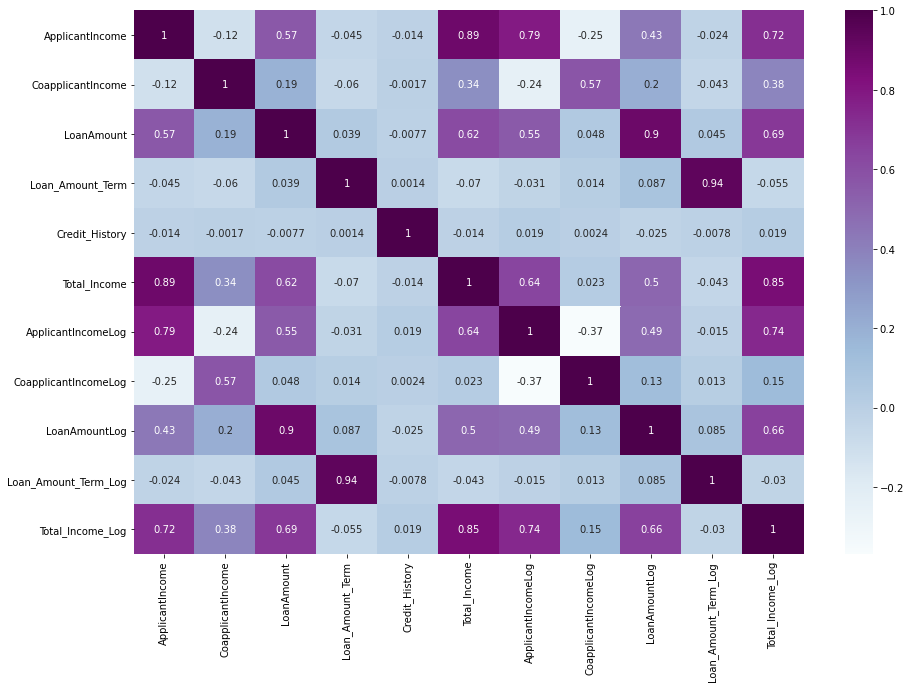

In [130]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [132]:
   cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
data = data.drop(columns=cols, axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.888878,8.699681


# Label encoding

In [157]:

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

In [135]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.888878,8.699681


In [ ]:
#Train-Test Split

In [141]:
x = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

In [142]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [145]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
92,1,1,2,1,0,1.0,2,8.093462,4.394449,5.888878,8.535819
304,1,0,0,0,0,1.0,0,8.294050,4.941642,5.888878,8.779711
68,1,1,3,1,1,1.0,2,8.867850,4.828314,4.110874,8.867991
15,1,0,0,0,0,1.0,2,8.507143,4.828314,5.888878,8.507345
211,1,1,3,0,0,0.0,1,8.140316,4.852030,5.888878,8.451267
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.0,1,7.536364,4.574711,5.888878,8.229778
106,1,1,2,0,0,1.0,2,9.342859,5.416100,5.888878,9.436998
270,0,0,0,0,0,1.0,2,8.082402,3.401197,5.888878,8.082711
435,0,1,0,0,0,1.0,1,9.215029,4.986426,5.484797,9.215129


In [146]:
y_train

92     1
304    1
68     1
15     1
211    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 460, dtype: int32

# Model Training

In [147]:

from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [149]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 70.2025856324137


In [150]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 78.34199653471944


In [186]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 80.45848327335733
